In [1]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf

mat = scipy.io.loadmat('ex5data1.mat')
x = mat['X']
y = mat['y']
x_cv = mat['Xval']
y_cv = mat['yval']
m = len(x)

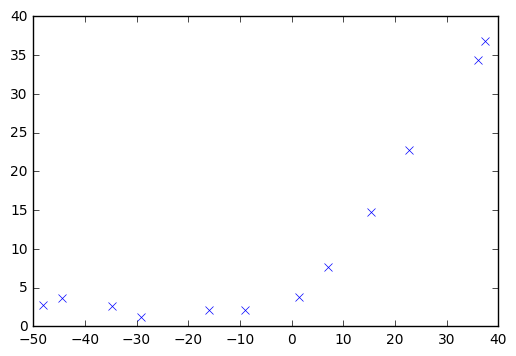

In [2]:
plt.plot(x, y, 'x')

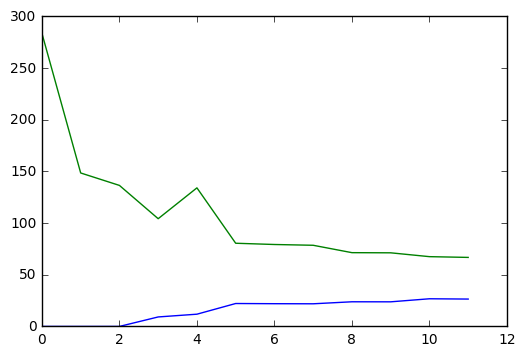

In [3]:
def run_with_params(x, y, l):
    W = tf.Variable(1, dtype=tf.float64)
    b = tf.Variable(1, dtype=tf.float64)

    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    h = x * W + b
    train_cost= (tf.nn.l2_loss(h-y) + tf.nn.l2_loss(W)) / 2 / m
    train = tf.train.GradientDescentOptimizer(0.004).minimize(train_cost)
    for i in range(200):
        a,c = sess.run([train, train_cost])
    h_cv = x_cv * W + b
    cv_cost = tf.nn.l2_loss(h_cv-y_cv) / 2 / m
    return sess.run([train_cost, cv_cost]) 

plt.plot(map(lambda i: run_with_params(x[0:i], y[0:i], 0), xrange(m)))


# Polynomial Regression with Normalization

In [4]:
def polynomialFeatures(x, p):
    return np.column_stack(map(lambda a: x ** a, range(1, p + 1)))
def featureNormalize(x):
    means = x.mean(axis=0)
    stds = x.std(axis=0)
    return (x - means ) / stds, means, stds

def regression(x, y, l, p = 8):
    x_n, means, stds = featureNormalize(polynomialFeatures(x, p))
    W = tf.Variable(tf.zeros((p, 1), dtype=tf.float64))
    b = tf.Variable(1, dtype=tf.float64)

    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    h = tf.matmul(x_n, W) + b
    train_cost= (tf.nn.l2_loss(h-y) + l * tf.nn.l2_loss(W)) / 2 / m
    train = tf.train.GradientDescentOptimizer(0.1).minimize(train_cost)

    for i in range(3000):
        a,c = sess.run([train, train_cost])
    
    x_cv_pol = polynomialFeatures(x_cv, p)
    h_cv = tf.matmul(((x_cv_pol - means) / stds), W) + b
    cv_cost = tf.nn.l2_loss(h_cv-y_cv) / 2 / m
    return sess.run([train_cost, cv_cost]) 


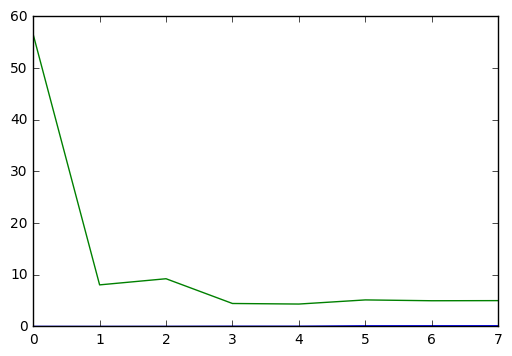

In [5]:
plt.plot(map(lambda i: regression(x[0:i], y[0:i], 0), range(4, 12)))

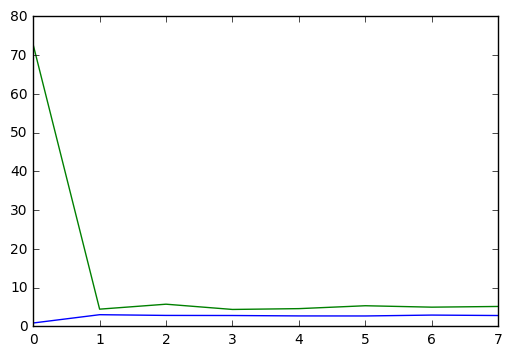

In [6]:
plt.plot(map(lambda i: regression(x[0:i], y[0:i], 1), range(4, 12)))

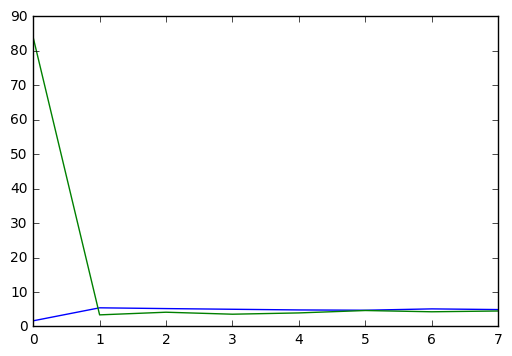

In [7]:
plt.plot(map(lambda i: regression(x[0:i], y[0:i], 2), range(4, 12)))

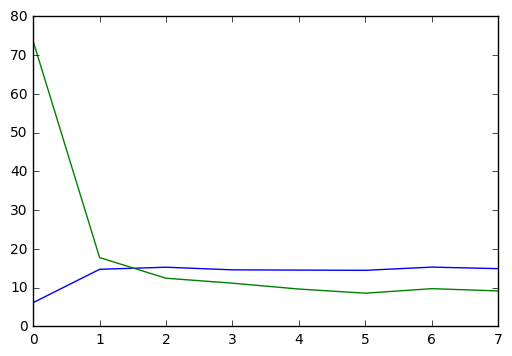

In [8]:
plt.plot(map(lambda i: regression(x[0:i], y[0:i], 10), range(4, 12)))

# Selecting lambda using a cross validation set

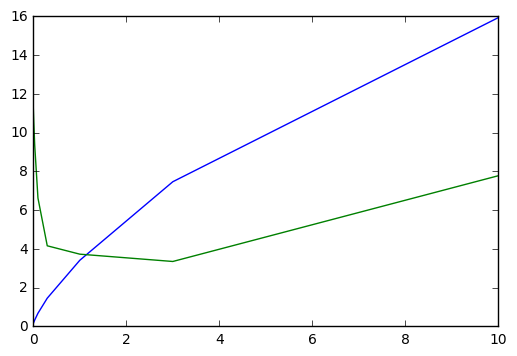

In [11]:
plt.plot([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10], map(lambda i: regression(x, y, i), [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]))

In this case, it looks like the best lambda to choose around 1.